# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Basin Hopping



# What is Basin Hopping algorithm?
<hr style="border:2px solid black"> </hr>


- It is an algorithm suited for nonlinear objective functions with multiple optima.
- As such is defined as a global optmisation algorithm. 
- Global optimization algorithms are intended to locate the single global optima among potentially multiple local (non-global) optimal.

- The algorithms involve cycling two steps, a perturbation of good candidate solutions and the application of a local search to the perturbed solution. The algorithm transforms the complex energy landscape into a collection of basins, and explores them by hopping, which is achieved by random Monte Carlo moves and acceptance/rejection using the Metropolis criterion. The perturbation allows the search algorithm to jump to new regions of the search space and potentially locate a new basin leading to a different optima, e.g. “basin hopping” in the techniques name. The local search allows the algorithm to traverse the new basin to the optima.



# Import modules
<hr style="border:2px solid black"> </hr>

In [6]:
from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import basinhopping
from numpy.random import rand

# Example #1
<hr style="border:2px solid black"> </hr>


- The Ackley function is an example of an objective function that has a single global optima and multiple local optima in which a local search might get stuck.

- As such, a global optimization technique is required. It is a two-dimensional objective function that has a global optima at [0,0], which evaluates to 0.0



In [9]:
# objective function
def objective(x, y):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

In [10]:
# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)


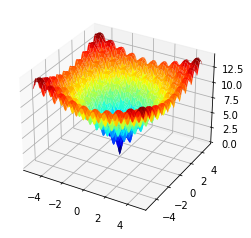

In [11]:
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [13]:
# objective function
def objective(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

In [15]:
# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + rand(2) * (r_max - r_min)
# perform the basin hopping search
result = basinhopping(objective, pt, stepsize=0.5, niter=200)

In [16]:
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['requested number of basinhopping iterations completed successfully']
Total Evaluations: 51526
Solution: f([ 1.70499951e-10 -1.99928119e-10]) = 0.00000


# Example #2
<hr style="border:2px solid black"> </hr>


- The Himmelblau function is an example of an objective function that has multiple global optima.

- Specifically, it has four optima and each has the same objective function evaluation. It is a two-dimensional objective function that has a global optima at [3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584428, -1.848126].

- This means each run of a global optimization algorithm may find a different global optima.



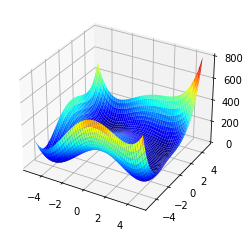

In [17]:
# objective function
def objective(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


# define range for input
r_min, r_max = -5.0, 5.0
# sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.gca(projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
pyplot.show()

In [18]:
# objective function
def objective(v):
    x, y = v
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2


# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + rand(2) * (r_max - r_min)
# perform the basin hopping search
result = basinhopping(objective, pt, stepsize=0.5, niter=200)
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : ['requested number of basinhopping iterations completed successfully']
Total Evaluations: 5808
Solution: f([-2.80511809  3.13131252]) = 0.00000


# References
<hr style="border:2px solid black"> </hr>


- https://machinelearningmastery.com/basin-hopping-optimization-in-python/
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html

